<a href="https://colab.research.google.com/github/allydrzewo/CS370-Assignments/blob/main/assignment-3/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1

In [2]:
!pip install torch torchvision opencv-python matplotlib
!pip install pytube3
!pip install -U yt-dlp
!yt-dlp --version
!pip install --upgrade pytube
from pytube import request
request.default_range_size = 1048576

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 77.1 MB/s eta 0:00:00
2024.11.18
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.4 MB/s eta 0:00:00


In [3]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F

In [4]:
# Load Faster R-CNN with a ResNet-50 backbone pre-trained on COCO dataset
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set model to evaluation mode

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 137MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
!yt-dlp -f "bestvideo+bestaudio" -o "sports_video.mp4" https://youtu.be/vUnuDTVHwGE?si=l4UFCfROSub0eQgj

[youtube] Extracting URL: https://youtu.be/vUnuDTVHwGE?si=l4UFCfROSub0eQgj
[youtube] vUnuDTVHwGE: Downloading webpage
[youtube] vUnuDTVHwGE: Downloading ios player API JSON
[youtube] vUnuDTVHwGE: Downloading mweb player API JSON
[youtube] vUnuDTVHwGE: Downloading player 89dfc5b3
[youtube] vUnuDTVHwGE: Downloading m3u8 information
[info] vUnuDTVHwGE: Downloading 1 format(s): 136+251
[download] Destination: sports_video.mp4.f136.mp4
[download] 100% of   11.14MiB in 00:00:00 at 38.28MiB/s
[download] Destination: sports_video.mp4.f251.webm
[download] 100% of   19.27KiB in 00:00:00 at 48.75KiB/s
[Merger] Merging formats into "sports_video.mp4.mkv"
Deleting original file sports_video.mp4.f251.webm (pass -k to keep)
Deleting original file sports_video.mp4.f136.mp4 (pass -k to keep)


In [6]:
import cv2
import os

# Video path is hardcoded since command-line download was used
video_path = "sports_video.mp4.mkv"

# Frame extraction function
def get_frames(video_path):
    frames = []
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return frames

    # Read frames
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("End of video or unable to fetch the frame.")
            break
        frames.append(frame)
    cap.release()
    print(f"Total frames extracted: {len(frames)}")
    return frames

# Extract frames
if os.path.exists(video_path):
    frames = get_frames(video_path)
    if frames:
        print(f"Successfully extracted {len(frames)} frames.")
    else:
        print("No frames were extracted.")
else:
    print(f"Error: Video file not found at {video_path}.")

End of video or unable to fetch the frame.
Total frames extracted: 1074
Successfully extracted 1074 frames.


In [7]:
def preprocess_frame(frame):
    # Convert BGR (OpenCV format) to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Convert RGB frame to a PyTorch tensor
    frame_tensor = F.to_tensor(frame_rgb)
    return frame_tensor

# Try preprocessing on first frame
if frames:
    sample_frame_tensor = preprocess_frame(frames[0])
    print("Sample frame tensor shape:", sample_frame_tensor.shape)
else:
    print("No frames to preprocess.")

Sample frame tensor shape: torch.Size([3, 720, 1280])


In [8]:
with torch.no_grad():
    predictions = model([sample_frame_tensor])

# Display predictions
predictions = predictions[0]
print(predictions.keys())

dict_keys(['boxes', 'labels', 'scores'])


In [9]:
def filter_predictions(predictions, score_threshold=0.5, target_classes=[1, 37]): # 1 is person, 37 is sports ball
    boxes = predictions['boxes']
    labels = predictions['labels']
    scores = predictions['scores']

    filtered_boxes = []
    for i in range(len(scores)):
        if scores[i] >= score_threshold and labels[i].item() in target_classes:
            filtered_boxes.append((boxes[i], labels[i], scores[i]))
    return filtered_boxes

# Apply filter on sample prediction
filtered_boxes = filter_predictions(predictions)

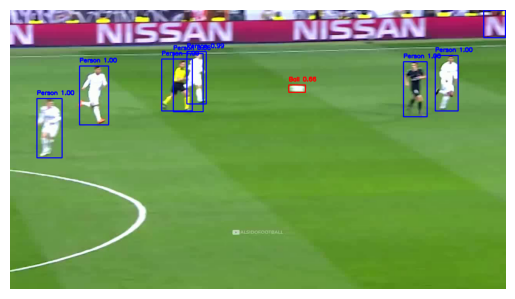

In [10]:
def draw_boxes(frame, filtered_boxes):
    for box, label, score in filtered_boxes:
        x1, y1, x2, y2 = box.int().tolist()
        color = (255, 0, 0) if label == 1 else (0, 0, 255)  # Blue for person, red for ball
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        label_name = "Person" if label == 1 else "Ball"
        cv2.putText(frame, f"{label_name} {score:.2f}", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return frame

# Show sample frame
sample_frame_with_boxes = draw_boxes(frames[0].copy(), filtered_boxes)
plt.imshow(cv2.cvtColor(sample_frame_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
output_frames = []
for frame in frames:
    frame_tensor = preprocess_frame(frame)
    with torch.no_grad():
        predictions = model([frame_tensor])[0]
    filtered_boxes = filter_predictions(predictions)
    frame_with_boxes = draw_boxes(frame, filtered_boxes)
    output_frames.append(frame_with_boxes)

# Save frames as video
height, width, layers = output_frames[0].shape
out = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc(*'XVID'), 20, (width, height))

for frame in output_frames:
    out.write(frame)
out.release()

In [ ]:
import cv2
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Video writer
height, width, layers = frames[0].shape
out = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc(*'XVID'), 20, (width, height))

frame_skip = 5  # Process every 5th frame
batch_size = 2  # Smaller batch size for better performance

for i in range(0, len(frames), batch_size):
    # Process frames in batches, skip unneeded frames
    batch_frames = frames[i:i + batch_size]
    batch_frames = [frame for j, frame in enumerate(batch_frames) if (i + j) % frame_skip == 0]

    # Resize and preprocess frames
    batch_tensors = [preprocess_frame(frame).to(device) for frame in batch_frames]

    if batch_tensors:
        # Perform predictions
        with torch.no_grad():
            batch_predictions = model(batch_tensors)

        # Process each frame's predictions
        for frame, predictions in zip(batch_frames, batch_predictions):
            filtered_boxes = filter_predictions(predictions)
            frame_with_boxes = draw_boxes(frame, filtered_boxes)
            out.write(frame_with_boxes)

out.release()

#Task 2

In [ ]:
!pip install deep-sort-realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 68.0 MB/s eta 0:00:00


In [ ]:
from deep_sort_realtime.deepsort_tracker import DeepSort
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F

# Initialize the DeepSORT tracker
tracker = DeepSort(
    max_age=30,
    n_init=3,
    max_iou_distance=0.7,
    nms_max_overlap=1.0,
    max_cosine_distance=0.2,
    nn_budget=100,
    override_track_class=None
)

In [ ]:
def filter_predictions(predictions, score_threshold=0.5, target_classes=[1, 37]):
    # Filter boxes with a score threshold and for specified target classes (1: person, 37: soccer ball)
    boxes, scores, labels = predictions['boxes'], predictions['scores'], predictions['labels']
    filtered_boxes = []
    for i in range(len(scores)):
        if scores[i] >= score_threshold and labels[i].item() in target_classes:
            # Format for DeepSORT: (x1, y1, x2, y2, confidence, class_id)
            box = boxes[i].tolist()
            score = scores[i].item()
            label = labels[i].item()
            filtered_boxes.append((box, score, label))
    return filtered_boxes

In [ ]:
def track_objects(frames, model, tracker, target_classes=[1, 37], score_threshold=0.5):
    tracked_frames = []
    for frame in frames:
        # Preprocess frame for detection
        frame_tensor = preprocess_frame(frame)
        with torch.no_grad():
            # Generate predictions
            predictions = model([frame_tensor])[0]
        # Filter predictions
        detections = filter_predictions(predictions, score_threshold, target_classes)
        # Prepare detection input for DeepSORT
        deepsort_detections = []
        for det in detections:
            box, score, label = det
            x1, y1, x2, y2 = box
            deepsort_detections.append(([x1, y1, x2, y2], score, label))

        # Update tracker
        tracks = tracker.update_tracks(deepsort_detections, frame=frame)

        # Draw tracking information on frame
        for track in tracks:
            if not track.is_confirmed() or track.time_since_update > 1:
                continue
            track_id = track.track_id
            bbox = track.to_tlbr()  # Bounding box (top-left, bottom-right)
            x1, y1, x2, y2 = map(int, bbox)
            class_id = track.get_det_class()
            label_name = "Person" if class_id == 1 else "Ball"
            color = (255, 0, 0) if class_id == 1 else (0, 0, 255)
            # Draw bounding box and tracking ID
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f"{label_name} {track_id}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        tracked_frames.append(frame)
    return tracked_frames

In [ ]:
def save_tracked_video(frames, output_path="tracked_output.mp4", fps=30):
    height, width, _ = frames[0].shape
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    for frame in frames:
        out.write(frame)
    out.release()
# Track objects, save output video
tracked_frames = track_objects(frames, model, tracker)
save_tracked_video(tracked_frames)